In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [12]:
train_dir = './train'
test_dir = './test'

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,    # Rango de corte aleatorio
    zoom_range=0.2,     # Rango de zoom aleatorio
    horizontal_flip=True # Volteo horizontal aleatorio
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),  # Tamaño al que se redimensionarán las imágenes
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [14]:
"""
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
"""

"\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),\n    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),\n    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),\n    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(20, activation='relu'),\n    tf.keras.layers.Dense(20, activation='relu'),\n    tf.keras.layers.Dense(2, activation='softmax')\n])\n"

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 1)),
    tf.keras.layers.Dense(20, activation=tf.nn.relu),
    tf.keras.layers.Dense(20, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.softmax)
])


c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Si tienes una clasificación binaria usa 'binary_crossentropy'
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 20)             │        81,940 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,381 (321.80 KB)

 Trainable params: 82,381 (321.80 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Ajustar el modelo
history = model.fit(
    train_generator,                    # Generador de datos de entrenamiento
    steps_per_epoch=len(train_generator), # Número de batches por época (opcionalmente podrías definirlo manualmente)
    epochs=10,                          # Número de épocas de entrenamiento
    validation_data=test_generator,     # Generador de datos de validación
    validation_steps=len(test_generator) # Número de batches de validación por época
)


Epoch 1/10


c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.4650 - loss: 0.0000e+00

c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


372/372 ━━━━━━━━━━━━━━━━━━━━ 47s 115ms/step - accuracy: 0.4650 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 2/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
  1/372 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.5312 - loss: 0.0000e+00

c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


372/372 ━━━━━━━━━━━━━━━━━━━━ 39s 104ms/step - accuracy: 0.4653 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 4/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 99us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.4753 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 6/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 66us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 60s 163ms/step - accuracy: 0.4748 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 8/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.4742 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 10/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 52us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [24]:
# Guardar el modelo completo
model.save('models/segundo_cnn.h5')

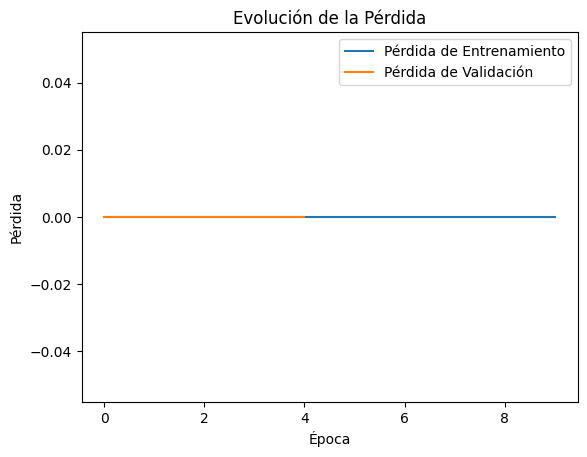

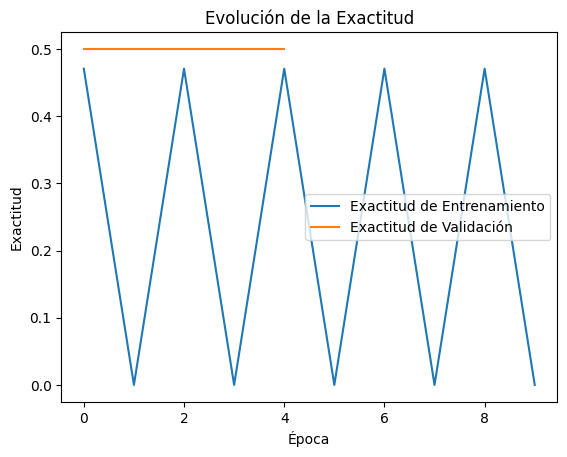

In [25]:
# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la exactitud
plt.plot(history.history['accuracy'], label='Exactitud de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Exactitud de Validación')
plt.title('Evolución de la Exactitud')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

In [29]:
from IPython.display import display, HTML

html_content = """
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Gráficas</title>
</head>
<body>
    <p>Esto no es exactamente lo que buscamos, ya que la gráfica que estamos buscando se parece más a esta:</p>
    <img src="img/perdida.png" alt="Gráfica Correcta" width="250">
    <img src="img/bien_entrenado.png" alt="Gráfica Correcta" width="250">
</body>
</html>
"""

# Mostrar el contenido HTML en el notebook
display(HTML(html_content))

Crearemos un nuevo modelo con menos capas para ver que resultado obtenemos